# Tweeepy Ego-Network
### A 1-step distance network graph with weighted nodes and edges

Imports necessary for networkx to work.

In [1]:
import networkx as nx
import tweepy
import numpy as np
import random
from IPython.display import Image
import matplotlib.pyplot as plt

Authentication process for Twitter account. 

In [3]:
auth = tweepy.OAuthHandler("FBjEODcqiQfeJCnSb50vJcKDf", "NiApoWbxFdKURLZ4DXyKKJNEKByxIQoXmzrMa1Le3OCAR6Rdug")
auth.set_access_token("1289901056-QcokEcmzHJ0gdQ3mNIQQ1DXz1HrJO9TzdWp0NKE","ca0QKes5Yj5CsbPiqJDXSbrYerMigC9n8MM42c9PjjczR")
api = tweepy.API(auth, wait_on_rate_limit=True)

Set root user (center of the graph, initial node)

In [4]:
# root_user = api.me().screen_name if authenticated user is wanted as root
root_user = 'airbnb_mx'
u = api.get_user(root_user) # User api object

Initialize the graph. Define the function to set weights of edges. Set weights for every friend of the root user and for their friends, only taking the ones that are also friends with the root user.

In [ ]:
graph = nx.Graph()

# Add root_user to graph
graph.add_node(root_user, label=root_user, weight=u.statuses_count)
friends = api.friends(screen_name=root_user)

# Edge weight based on influence of following node A(the one who follows the other) and followers of A and B
def calculateEdgeWeight(follower_count_a, following_count_a, follower_count_b):
    follower_following_ratio = follower_count_a / following_count_a
    return follower_following_ratio * (follower_count_a - follower_count_b) / (follower_count_a + follower_count_b)

# Asigning weights
for f in friends:
    print("\nProcessing friends of ", f.screen_name)
    graph.add_node(f.screen_name, label=f.screen_name, weight=f.statuses_count)
    graph.add_edge(root_user, f.screen_name,
                   weight=calculateEdgeWeight(u.followers_count, u.friends_count, f.followers_count))
    if not f.protected:
        following_of_f = api.friends(screen_name=f.screen_name)
        for ff in following_of_f:
            for friend in friends:
                if friend.screen_name == ff.screen_name:
                    print(ff.screen_name, end=" | ")
                    graph.add_node(ff.screen_name, label=ff.screen_name, weight=ff.statuses_count)
                    graph.add_edge(f.screen_name, ff.screen_name, weight=calculateEdgeWeight(
                        f.followers_count, f.friends_count, ff.followers_count))

nx.read_gexf() can be used to read graphs outputed by networkx in an xml file. If the graph was already calculated it can be read uncommenting that line

In [13]:
graph = nx.read_gexf('airbnb_mx Ego-Network de dos niveles') # Read the graph if there already exits one
# design parameters
pos = nx.circular_layout(graph)
plt.figure(1,figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

To start drawing the graph, we need to iterate through all the weights and asign widths to unique weights so that each edge and node has its own width/size. 

108.99790470700842
-2.8823146851301757 | -2.8425094987797315 | -2.595630825201426 | -2.3559204047884506 | -2.3164888126443985 | 1.3094332772344017 | 1.6159179287590062 | -1.9089992794024497 | -1.9372199306306013 | 2.287020481250539 | 2.3778887663805777 | -1.1285496569904443 | 2.482763047497509 | 2.5310239244026893 | 2.6549994418944896 | 2.950689828234583 | 2.9462336821603383 | 3.0 | 2.9864300208661234 | 2.9780173597592903 | -0.04190923335490238 | 

{'airbnb_mx': Text(1.0, 6.386211942486185e-09, 'airbnb_mx'),
 'IvetteAguilar5': Text(0.9555727839312287, 0.29475519710167364, 'IvetteAguilar5'),
 'Richlopezg': Text(0.8262387513497893, 0.5633201068935366, 'Richlopezg'),
 'chrislehane': Text(0.623489796981744, 0.7818315095780263, 'chrislehane'),
 'sergio_carrasco': Text(0.3653409776820104, 0.930873758356796, 'sergio_carrasco'),
 'dianagyn': Text(0.07473012027099377, 0.9972037740396614, 'dianagyn'),
 'nacho_aldaz': Text(-0.22252094789009752, 0.9749279089537858, 'nacho_aldaz'),
 'liderenturismo': Text(-0.5000000601368291, 0.8660253949342829, 'liderenturismo'),
 'Sanhgerman': Text(-0.7330519563147894, 0.6801726884360018, 'Sanhgerman'),
 'elgourmet': Text(-0.9009688503334099, 0.4338838225439488, 'elgourmet'),
 'pujolrestaurant': Text(-0.9888308055304454, 0.14904232967078768, 'pujolrestaurant'),
 'enriqueolvera': Text(-0.9888308055304454, -0.14904224239255778, 'enriqueolvera'),
 'yoviajeromx': Text(-0.9009688503334099, -0.43388375016688013, 

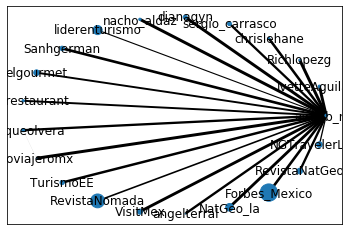

In [15]:
all_weights = []
# Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in graph.edges(data=True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness

max_edge_weight = max(all_weights)
print(max_edge_weight)
# Get unique weights
unique_weights = list(set(all_weights))

# Plot the edges assigning specific edge widths to weights
for weight in unique_weights:
    # Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph.edges(data=True) if edge_attr['weight']==weight]
    width = weight/max_edge_weight*3
    print(width, end=" | ")
    nx.draw_networkx_edges(graph,pos,edgelist=weighted_edges,width=width)

all_node_weights=[]
for node in graph.nodes(data=True):
    all_node_weights.append(node[1]['weight'])

node_sizes = []
max_node_weight = max(all_node_weights)
for node_weight in all_node_weights:
    node_sizes.append(node_weight/max_node_weight*300)
    
nx.draw_networkx_nodes(graph, pos, node_size=node_sizes)
nx.draw_networkx_labels(graph, pos)


Ploting the graph and setting the name to save it.

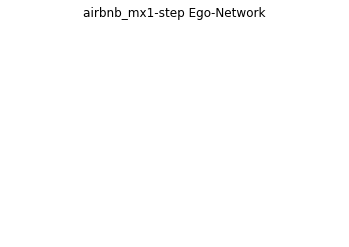

In [8]:
#Plot the graph
plt.axis('off')
plt.title(root_user + '1-step Ego-Network')
plt.savefig("egoNetwork.png") 
plt.show()